In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
# Load Pima Indians Diabetes dataset from URL
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)

In [15]:
# Assign column names based on dataset documentation
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
              'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [16]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [20]:
# Split dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 80% training, 20% testing
    random_state=42  # For reproducibility
)

print("\nData Split Summary:")
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")


Data Split Summary:
Training features shape: (614, 8)
Test features shape: (154, 8)


In [21]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Create and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")


Model Performance Metrics:
Accuracy: 0.753


In [23]:
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



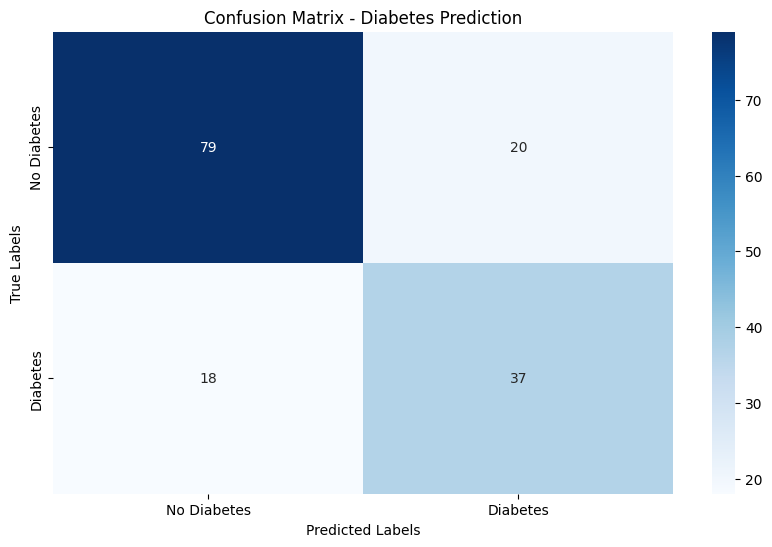

In [24]:
# Create confusion matrix visualization
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            cmap='Blues')
plt.title('Confusion Matrix - Diabetes Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()